# Random Signals and LTI-Systems

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Power Spectral Densitity

For a wide-sense stationary (WSS) real-valued random process $x[k]$, the [power spectral density](../random_signals/power_spectral_densities.ipynb#Power-Spectral-Density) (PSD) $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ is given as the discrete-time Fourier transformation (DTFT) of the auto-correlation function (ACF) $\varphi_{xx}[\kappa]$

\begin{equation}
\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \sum_{\kappa = -\infty}^{\infty} \varphi_{xx}[\kappa] \; \mathrm{e}^{\,-\mathrm{j}\,\Omega\,\kappa}
\end{equation}

Under the assumption of a real-valued LTI system with impulse response $h[k] \in \mathbb{R}$, the PSD $\Phi_{yy}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ of the output signal of an LTI system $y[k] = \mathcal{H} \{ x[k] \}$ is derived by taking the DTFT of the [ACF of the output signal](../random_signals_LTI_systems/correlation_functions.ipynb#Auto-Correlation-Function) $\varphi_{yy}[\kappa]$

\begin{align}
\Phi_{yy}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) &= \sum_{\kappa = -\infty}^{\infty} \underbrace{h[\kappa] * h[-\kappa]}_{\varphi_{hh}[\kappa]} * \varphi_{xx}[\kappa] \; \mathrm{e}^{\,-\mathrm{j}\,\Omega\,\kappa} \\ 
&= H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \cdot H(\mathrm{e}^{\,-\mathrm{j}\,\Omega}) \cdot \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = | H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) |^2 \cdot \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})
\end{align}

The PSD of the output signal $\Phi_{yy}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ of an LTI system is given by the  PSD of the input signal $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ multiplied with the squared magnitude $| H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) |^2$ of the transfer function of the system.

### Example - Pink Noise

It can be concluded from above findings, that filtering can be applied to a white noise random signal $x[k]$ with $\Phi_{yy}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = N_0$ in order to create a random signal $y[k] = x[k] * h[k]$ with a desired PSD

\begin{equation}
\Phi_{yy}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = N_0 \cdot | H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) |^2
\end{equation}

where $N_0$ denotes the power per frequency of the white noise. Such a random signal is commonly termed as [*colored noise*](https://en.wikipedia.org/wiki/Colors_of_noise). Different application specific types of colored noise exist. One of these is [*pink noise*](https://en.wikipedia.org/wiki/Pink_noise) whose PSD is inversely proportional to the frequency. The approximation of a pink noise signal by filtering is illustrated by the following example. The PSDs $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ and $\Phi_{yy}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ are estimated from $x[k]$ and $y[k]$ using the [Welch technique](../spectral_estimation_random_signals/welch_method.ipynb).

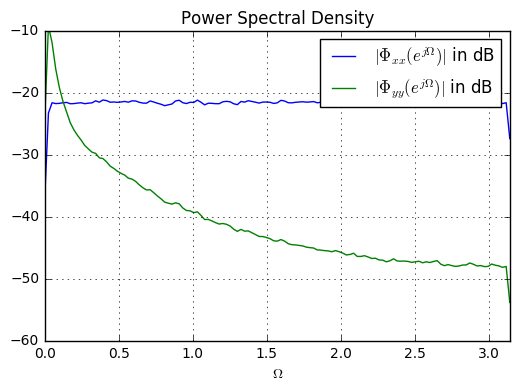

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

fs = 44100
N = 5*fs

# generate uniformly distributed white noise
np.random.seed(1)
x = np.random.uniform(size=N) - .5
# filter white noise to yield pink noise
# see http://www.firstpr.com.au/dsp/pink-noise/#Filtering
a = np.poly([0.99572754, 0.94790649, 0.53567505])  # denominator coefficients
b = np.poly([0.98443604, 0.83392334, 0.07568359])  # numerator coefficients
y = 1/3 * sig.lfilter(b, a, x)
# estimate PSDs using Welch's technique
f, Pxx = sig.csd(x, x, nperseg = 256)
f, Pyy = sig.csd(y, y, nperseg = 256)

# PSDs
Om = f * 2 * np.pi
plt.plot(Om, 20*np.log10(np.abs(.5*Pxx)), label=r'$| \Phi_{xx}(e^{j \Omega}) |$ in dB')
plt.plot(Om, 20*np.log10(np.abs(.5*Pyy)), label=r'$| \Phi_{yy}(e^{j \Omega}) |$ in dB')
plt.title('Power Spectral Density')
plt.xlabel(r'$\Omega$')
plt.legend()
plt.axis([0, np.pi, -60, -10])
plt.grid()

Let's listen to white and pink noise

In [2]:
from scipy.io import wavfile

wavfile.write('uniform_white_noise.wav', fs, np.int16(x*32768))
wavfile.write('uniform_pink_noise.wav', fs, np.int16(y*32768))

**White noise**
<audio src="./uniform_white_noise.wav" controls>Your browser does not support the audio element.</audio>[./uniform_white_noise.wav](./uniform_white_noise.wav)

**Pink noise**
<audio src="./uniform_pink_noise.wav" controls>Your browser does not support the audio element.</audio>[./uniform_pink_noise.wav](./uniform_white_noise.wav)

## Cross-Power Spectral Densities

The cross-power spectral densities $\Phi_{yx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ and $\Phi_{xy}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ between the in- and output of an LTI system are given by taking the DTFT of the [cross-correlation functions](../random_signals_LTI_systems/correlation_functions.ipynb#Cross-Correlation-Function) (CCF) $\varphi_{yx}[\kappa]$ and $\varphi_{xy}[\kappa]$. Hence,

\begin{equation}
\Phi_{yx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \sum_{\kappa = -\infty}^{\infty} h[\kappa] * \varphi_{xx}[\kappa] \; \mathrm{e}^{\,-\mathrm{j}\,\Omega\,\kappa} = \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \cdot H(\mathrm{e}^{\,\mathrm{j}\,\Omega})
\end{equation}

and

\begin{equation}
\Phi_{xy}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \sum_{\kappa = -\infty}^{\infty} h[-\kappa] * \varphi_{xx}[\kappa] \; \mathrm{e}^{\,-\mathrm{j}\,\Omega\,\kappa} = \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \cdot H(\mathrm{e}^{\,-\mathrm{j}\,\Omega})
\end{equation}

## System Identification by Spectral Division

Using the result above for the cross-power spectral density $\Phi_{yx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ between out- and input, and the relation of the [CCF of finite-length signals to the convolution](../random_signals/correlation_functions.ipynb#Definition) yields

\begin{equation}
H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \frac{\Phi_{yx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})}{\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})} = \frac{\frac{1}{K} Y(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \cdot X(\mathrm{e}^{\,-\mathrm{j}\,\Omega})}{\frac{1}{K} X(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \cdot X(\mathrm{e}^{\,-\mathrm{j}\,\Omega})} 
= \frac{Y(\mathrm{e}^{\,\mathrm{j}\,\Omega})}{X(\mathrm{e}^{\,\mathrm{j}\,\Omega})}
\end{equation}

holding for $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \neq 0$ and $X(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \neq 0$. Hence, the transfer function $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ of an unknown system can be derived by dividing the spectrum of the output signal $Y(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ through the spectrum of the input signal $X(\mathrm{e}^{\,\mathrm{j}\,\Omega})$. This is equal to the [definition of the transfer function](https://en.wikipedia.org/wiki/Transfer_function). However, care has to be taken that the spectrum of the input signal does not contain zeros.

Above relation can be realized by the discrete Fourier transformation (DFT) by taking into account that a multiplication of two spectra $X[\mu] \cdot Y[\mu]$ results in the cyclic/periodic convolution $x[k] \circledast y[k]$. Since we aim at a linear convolution, zero-padding of the in- and output signal has to be applied.

### Example

We consider the estimation of the impulse response $h[k] = \mathcal{F}_*^{-1} \{ H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \}$ of an unknown system using the spectral division method. Normally distributed white noise with variance $\sigma_n^2 = 1$ is used as input signal $x[k]$. In order to show the effect of sensor noise, normally distributed white noise $n[k]$ with the variance $\sigma_n^2 = 0.01$ is added to the output signal $y[k] = x[k] * h[k] + n[k]$.

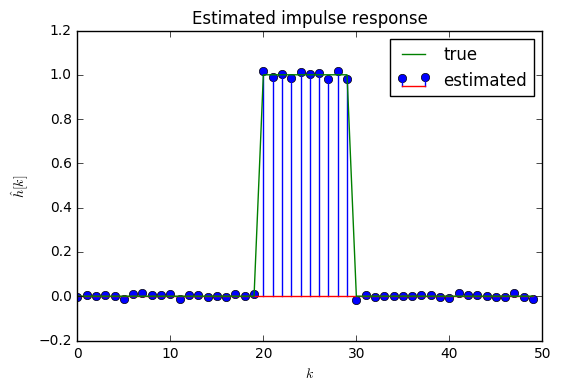

In [3]:
N = 1000  # number of samples for input signal

# generate input signal
np.random.seed(1)
x = np.random.normal(size=N, scale=1)  # normally distributed (zero-mean, unit-variance) white noise
# impulse response of the system
h = np.concatenate((np.zeros(20), np.ones(10), np.zeros(20)))
# output signal by convolution
y = np.convolve(h, x, mode='full')
# add noise to the output signal
y = y + np.random.normal(size=y.shape, scale=.1)

# zero-padding of input signal
x = np.concatenate((x, np.zeros(len(h)-1)))
# estimate transfer function
H = np.fft.rfft(y)/np.fft.rfft(x)
# compute inpulse response
he = np.fft.irfft(H)
he = he[0:len(h)]

# plot impulse response
plt.figure()
plt.stem(he, label='estimated')
plt.plot(h, 'g-', label='true')
plt.title('Estimated impulse response')
plt.xlabel(r'$k$')
plt.ylabel(r'$\hat{h}[k]$')
plt.legend();

**Exercise**

* Change the length `N` of the input signal. What happens?
* Change the variance $\sigma_n^2$ of the additive noise. What happens?

Increasing the length `N` of the input signal lowers the uncertainty in estimating the impulse response. The higher the variance of the additive white noise, the higher the uncertainties in the estimated impulse response.


**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples, 2016-2017*.